<a href="https://colab.research.google.com/github/Jubelo11/CN6000/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

== Part A: Gradient Descent Demo ==
[GD] Iter    0 | b0=0.0425 | b1=0.1275 | Cost=10.8750
[GD] Iter  100 | b0=0.4454 | b1=1.5483 | Cost=0.0541
[GD] Iter  200 | b0=0.3835 | b1=1.5696 | Cost=0.0498
[GD] Iter  300 | b0=0.3301 | b1=1.5877 | Cost=0.0466
[GD] Iter  400 | b0=0.2842 | b1=1.6033 | Cost=0.0443
[GD] Iter  500 | b0=0.2447 | b1=1.6168 | Cost=0.0425
[GD] Iter  600 | b0=0.2106 | b1=1.6284 | Cost=0.0412
[GD] Iter  700 | b0=0.1813 | b1=1.6383 | Cost=0.0403
[GD] Iter  800 | b0=0.1561 | b1=1.6469 | Cost=0.0395
[GD] Iter  900 | b0=0.1344 | b1=1.6543 | Cost=0.0390

[GD] Final coefficients: b0=0.1159, b1=1.6606


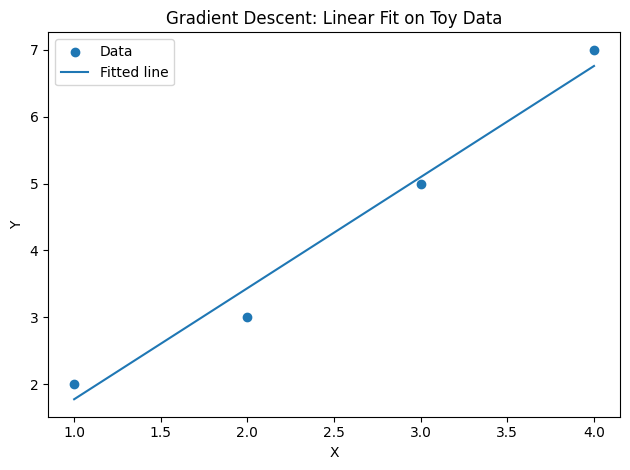

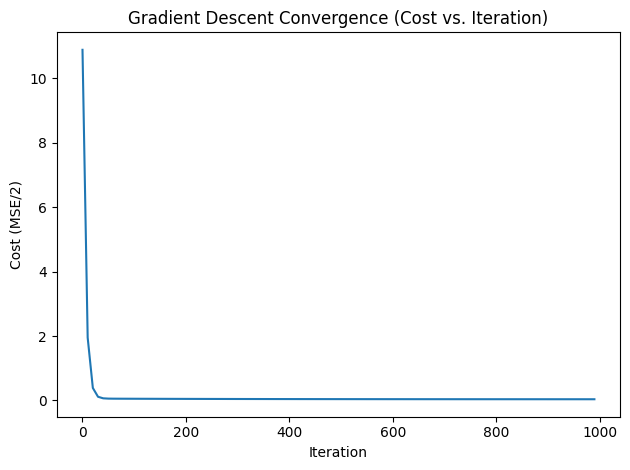


== Part B: Multiple Linear Regression Demo ==

=== Linear Regression (All Features) ===
MSE  : 0.5559
RMSE : 0.7456
MAE  : 0.5332
R^2  : 0.5758
Intercept: -37.023
Coefficients: [ 0.4487  0.0097 -0.1233  0.7831 -0.     -0.0035 -0.4198 -0.4337]
Features order: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Features with |corr| ≥ 0.5: ['MedInc']

=== Linear Regression (Selected Features) ===
MSE  : 0.7091
RMSE : 0.8421
MAE  : 0.6299
R^2  : 0.4589
Intercept: 0.445
Coefficients: [0.4193]
Features used: ['MedInc']


In [3]:
"""
Week 2: Gradient Descent & Multiple Linear Regression
Author: Jubelo Oladimeji
Module: CN6000
-----------------------------------------------------
What this script does
- Part A: Implements univariate Linear Regression with Gradient Descent on a tiny toy dataset.
- Part B: Trains a Multiple Linear Regression model on the California Housing dataset (scikit-learn),
          reports standard metrics, and compares "all-features" vs "high-correlation features".

Why it’s here
- It demonstrates both the mechanics (Gradient Descent) and the practical approach (scikit-learn).
- It’s written to be clear, readable, and easy to follow for assessors and classmates.

How to run
- Make sure you have Python 3.9+ and pip installed.
- Install dependencies: pip install numpy scikit-learn matplotlib pandas
- Run: python Week2_GradientDescent_and_LinearRegression.py
- Two plots will appear: the fitted line (toy example) and the GD convergence curve.
- The script will also print metrics for the California Housing regression task.
"""

from dataclasses import dataclass
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Part A: Gradient Descent


@dataclass
class GDConfig:
    learning_rate: float = 0.01
    iterations: int = 1000
    print_every: int = 100


def gradient_descent_linear(X: np.ndarray, Y: np.ndarray, cfg: GDConfig):
    """
    Simple Gradient Descent for y = b0 + b1 * x
    Returns:
        b0, b1, cost_history, record_every
    """
    # Ensure float dtype
    X = X.astype(float)
    Y = Y.astype(float)
    n = len(X)

    b0, b1 = 0.0, 0.0
    cost_history = []
    record_every = 10  # store cost every 10 iters for a smooth convergence curve

    for i in range(cfg.iterations):
        Y_pred = b0 + b1 * X
        # Gradients (MSE loss): J = (1/2n) * sum((Y_pred - Y)^2)
        db0 = (1 / n) * np.sum(Y_pred - Y)
        db1 = (1 / n) * np.sum((Y_pred - Y) * X)

        # Parameter update
        b0 -= cfg.learning_rate * db0
        b1 -= cfg.learning_rate * db1

        if i % cfg.print_every == 0:
            cost = (1 / (2 * n)) * np.sum((Y_pred - Y) ** 2)
            print(f"[GD] Iter {i:4d} | b0={b0:.4f} | b1={b1:.4f} | Cost={cost:.4f}")

        if i % record_every == 0:
            cost = (1 / (2 * n)) * np.sum((Y_pred - Y) ** 2)
            cost_history.append(cost)

    return b0, b1, cost_history, record_every


def demo_gradient_descent():
    # Tiny toy dataset
    X = np.array([1, 2, 3, 4], dtype=float)
    Y = np.array([2, 3, 5, 7], dtype=float)

    cfg = GDConfig(learning_rate=0.01, iterations=1000, print_every=100)
    b0, b1, history, step = gradient_descent_linear(X, Y, cfg)

    print(f"\n[GD] Final coefficients: b0={b0:.4f}, b1={b1:.4f}")

    # Plot the fitted line
    plt.figure()
    plt.scatter(X, Y, label="Data")
    plt.plot(X, b0 + b1 * X, label="Fitted line")
    plt.title("Gradient Descent: Linear Fit on Toy Data")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot the convergence curve
    plt.figure()
    plt.plot(np.arange(0, len(history) * step, step), history)
    plt.title("Gradient Descent Convergence (Cost vs. Iteration)")
    plt.xlabel("Iteration")
    plt.ylabel("Cost (MSE/2)")
    plt.tight_layout()
    plt.show()


# Part B: Multiple Linear Regression

def evaluate_regression(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n=== {label} ===")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"MAE  : {mae:.4f}")
    print(f"R^2  : {r2:.4f}")
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}


def demo_linear_regression(threshold=0.5):
    """
    Trains Linear Regression on the California Housing dataset using:
      - All features
      - Features whose absolute correlation with the target >= threshold
    Prints standard metrics for both, if the second set exists.
    """
 #load data set
    cal = fetch_california_housing()
    df = pd.DataFrame(cal.data, columns=cal.feature_names)
    df['MedHouseVal'] = cal.target


    X = df.drop('MedHouseVal', axis=1)
    y = df['MedHouseVal']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr = LinearRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    evaluate_regression(y_test, y_pred, label="Linear Regression (All Features)")
    print("Intercept:", round(lr.intercept_, 3))
    print("Coefficients:", np.round(lr.coef_, 4))
    print("Features order:", list(X.columns))

    # correlation-based selection
    corr = df.corr(numeric_only=True)
    corr_target = corr['MedHouseVal'].abs().sort_values(ascending=False)
    high_corr_features = [f for f in corr_target.index if f != 'MedHouseVal' and corr_target[f] >= threshold]
    print(f"\nFeatures with |corr| ≥ {threshold}: {high_corr_features}")

    if len(high_corr_features) > 0:
        Xs = df[high_corr_features]
        Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
        lr2 = LinearRegression().fit(Xs_train, ys_train)
        ys_pred = lr2.predict(Xs_test)
        evaluate_regression(ys_test, ys_pred, label="Linear Regression (Selected Features)")
        print("Intercept:", round(lr2.intercept_, 3))
        print("Coefficients:", np.round(lr2.coef_, 4))
        print("Features used:", high_corr_features)
    else:
        print("No features met the chosen threshold; consider lowering it (e.g., 0.15).")




if __name__ == "__main__":
    print("== Part A: Gradient Descent Demo ==")
    demo_gradient_descent()
    print("\n== Part B: Multiple Linear Regression Demo ==")

    demo_linear_regression(threshold=0.5)